<a href="https://colab.research.google.com/github/myller-silva/SO-trabalho-03-paginacao/blob/main/evaluate_aging_algorithm_with_varying_bits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [40]:
from collections import deque
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Algoritmos

In [41]:
def fifo(referencias_as_paginas, qtd_molduras):
  molduras = []
  faltas_de_pagina = 0

  for pagina in referencias_as_paginas:
    if pagina not in molduras:
      faltas_de_pagina += 1
      if len(molduras) == qtd_molduras:
        molduras.pop(0)
      molduras.append(pagina)

  return faltas_de_pagina


def aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits=None):
    if qtd_bits is None:
      qtd_bits = qtd_molduras
    molduras = []
    idade_paginas = []
    faltas_de_pagina = 0

    for pagina in referencias_as_paginas:
        if pagina in molduras:
            indice_pagina = molduras.index(pagina)
            idade_paginas[indice_pagina] >>= 1
            idade_paginas[indice_pagina] |= 1 << (qtd_bits - 1)
        else:
            faltas_de_pagina += 1
            idade_paginas = [idade >> 1 for idade in idade_paginas]
            if len(molduras) == qtd_molduras:
                indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
                molduras[indice_pagina_a_remover] = pagina
                idade_paginas[indice_pagina_a_remover] = 1 << (qtd_bits - 1)
            else:
                molduras.append(pagina)
                idade_paginas.append(1 << (qtd_bits - 1))
    return faltas_de_pagina


# FIFO vs Aging

In [42]:
def experimento_fifo_vs_aging(qtd_referencias, qtd_paginas, max_molduras = 64):
    paginas  = [i for i in range(qtd_paginas)]
    referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    # tamanho_molduras = [2**i for i in range( int(math.log2(max_molduras)) + 1) ] # se max_molduras == 16, entao [2^0, 2^1 , 2^2, 2^3]
    tamanho_molduras = [i for i in range(1, max_molduras+1)]
    fifo_acumulate = []
    aging_acumulate = []
    # print('molduras: ', tamanho_molduras)

    for tamanho_moldura in tamanho_molduras:
        fifo_acumulate.append(fifo(referencias_as_paginas, tamanho_moldura))
        aging_acumulate.append(aging_bits(referencias_as_paginas, tamanho_moldura))

    return fifo_acumulate, aging_acumulate, tamanho_molduras


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[990, 972, 949, 932, 917, 897, 886, 877, 856, 831, 817, 792, 779, 772, 760, 745, 724, 706, 684, 670, 655, 640, 630, 612, 594, 581, 563, 562, 551, 540, 533, 518]
[990, 973, 948, 932, 916, 903, 886, 875, 855, 835, 814, 800, 780, 765, 743, 732, 717, 704, 693, 677, 662, 642, 624, 609, 595, 582, 578, 555, 539, 524, 514, 499]


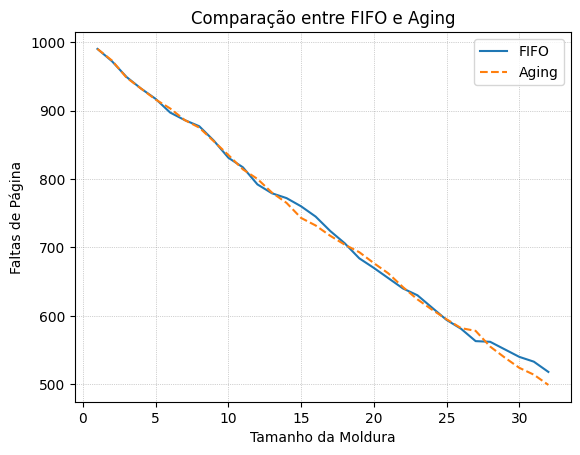

In [60]:
fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = 1000, qtd_paginas = 64, max_molduras=32)
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging')
plt.legend()
plt.show()


# Gráfico Médio


In [44]:
num_experiements = 100
qtd_paginas = 64
qtd_referencias = 1000
max_molduras = 32

paginas = np.arange(qtd_paginas)
m_r_fifo = np.zeros((num_experiements, max_molduras))
m_r_aging = np.zeros((num_experiements, max_molduras))

for i in range(num_experiements):
    print(f"\ri: {i}", end='')
    for j in range(1, max_molduras+1):
        referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
        fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = qtd_referencias, qtd_paginas = qtd_paginas, max_molduras=max_molduras)
        m_r_fifo[i, j-1] = fifo_array[j-1]
        m_r_aging[i, j-1] = aging_array[j-1]



i: 99

medias_fifo: [984.55 970.32 953.72 937.07 921.14 906.94 891.59 874.79 858.92 843.61
 830.92 811.28 799.34 784.67 769.09 753.28 734.05 721.45 704.67 692.03
 674.99 660.74 645.37 630.23 612.66 601.46 586.69 573.07 556.42 537.02
 525.46 507.28]
desvios_padrao_fifo: [ 3.73195659  4.91910561  6.28343855  7.38546546  8.10187633  8.30761097
 10.84536306 10.22281272 10.58175789 11.92803001 12.11914188 11.18398856
 12.56202213 13.61180003 13.06146623 11.865985   12.78622305 12.34615325
 12.88491754 15.59965064 13.75026909 14.74084122 15.7236478  16.16777969
 15.88724016 14.5419531  16.4558166  16.22359701 15.39232276 15.55119288
 16.91592149 15.11957671]
medias_aging: [984.55 970.3  953.6  937.01 920.95 906.93 891.17 875.52 859.31 843.8
 830.05 811.43 799.02 784.2  768.24 753.3  735.79 720.67 707.18 691.4
 674.51 660.37 646.44 630.2  612.64 600.93 586.39 572.61 553.13 537.05
 525.49 507.29]
desvios_padrao_aging: [ 3.73195659  4.93051721  6.15467302  7.33961171  8.08625377  8.65246208
 11.353462

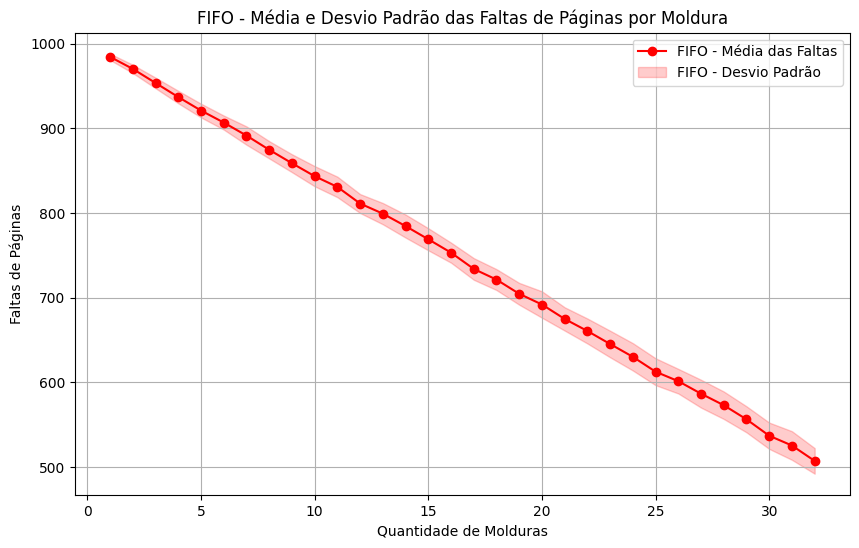

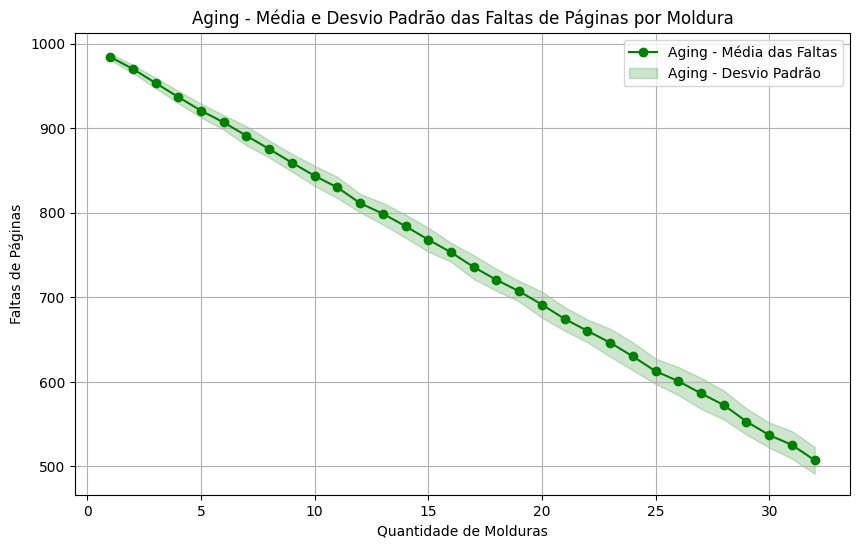

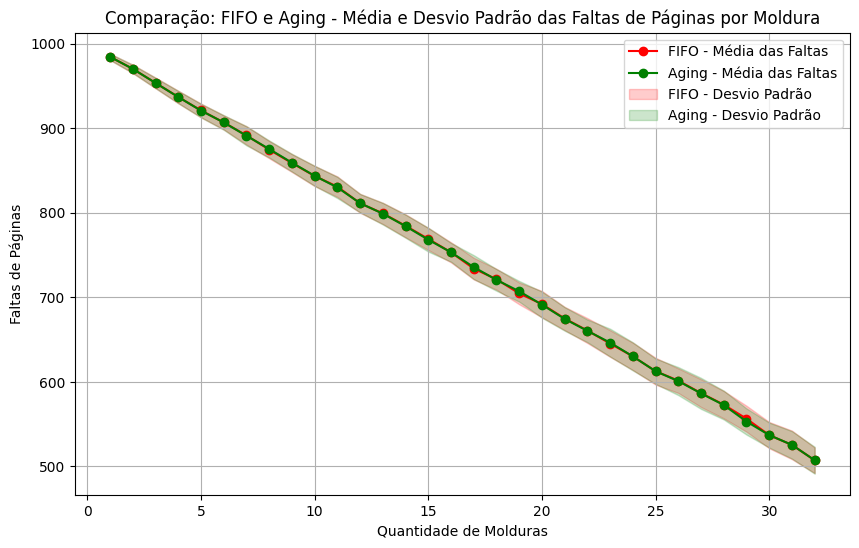

In [72]:
# Calcular as médias e desvios padrão
fifo_cor = "red"
aging_cor = "green"

medias_fifo = np.mean(m_r_fifo, axis=0)
desvios_padrao_fifo = np.std(m_r_fifo, axis=0)

medias_aging = np.mean(m_r_aging, axis=0)
desvios_padrao_aging = np.std(m_r_aging, axis=0)

print(f"medias_fifo: {medias_fifo}")
print(f"desvios_padrao_fifo: {desvios_padrao_fifo}")

print(f"medias_aging: {medias_aging}")
print(f"desvios_padrao_aging: {desvios_padrao_aging}")

# Quantidade de molduras
molduras = np.arange(1, max_molduras + 1)

# 1. Gráfico separado para FIFO
plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.title('FIFO - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico separado para Aging
plt.figure(figsize=(10, 6))
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gráfico combinando FIFO e Aging
plt.figure(figsize=(10, 6))
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Comparação: FIFO e Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

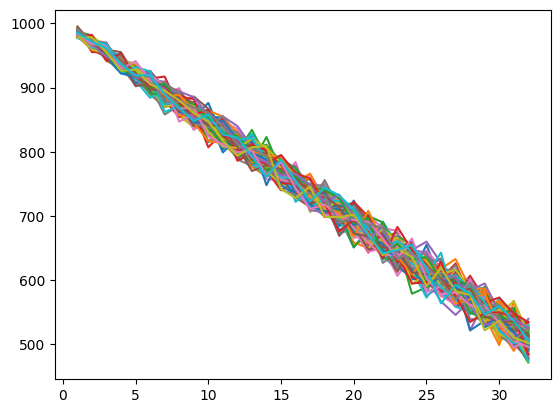

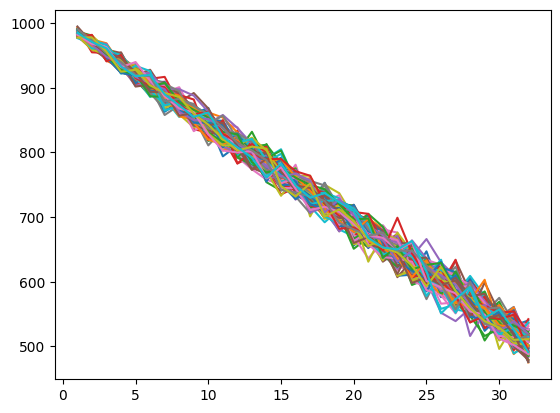

In [46]:
# plotar todas os fifos
for i in m_r_fifo:
    plt.plot(molduras, i,
            #  marker='o'
             )
plt.show()

# plotar todas os agings
for i in m_r_aging:
    plt.plot(molduras, i,
            #  marker='o'
             )
plt.show()

# Aging variando quantidade de bits para os contadores, usando as mesmas referências

In [47]:
def evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range):
    resultados = []
    for qtd_bits in bits_range:
        faltas = aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits)
        resultados.append(faltas)
    return resultados


In [57]:
qtd_referencias = 1000
qtd_paginas = 64
qtd_molduras = 32
max_bits = 64+1

bits_range = [i for i in range(2, max_bits)]
paginas = [i for i in range(qtd_paginas)]

referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)

{2: 550, 3: 557, 4: 535, 5: 536, 6: 547, 7: 550, 8: 528, 9: 527, 10: 541, 11: 521, 12: 529, 13: 539, 14: 532, 15: 521, 16: 515, 17: 535, 18: 515, 19: 525, 20: 517, 21: 516, 22: 519, 23: 520, 24: 517, 25: 523, 26: 521, 27: 524, 28: 523, 29: 522, 30: 522, 31: 523, 32: 522, 33: 522, 34: 522, 35: 522, 36: 523, 37: 522, 38: 522, 39: 522, 40: 522, 41: 522, 42: 524, 43: 523, 44: 523, 45: 523, 46: 523, 47: 523, 48: 523, 49: 523, 50: 523, 51: 523, 52: 523, 53: 523, 54: 523, 55: 523, 56: 523, 57: 523, 58: 523, 59: 523, 60: 523, 61: 523, 62: 523, 63: 523, 64: 523}


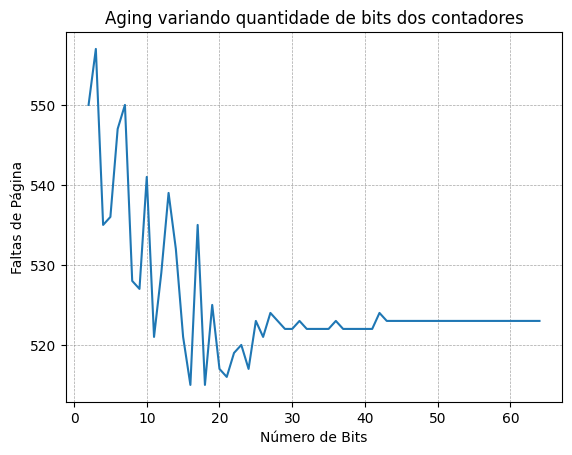

In [58]:
print(dict(zip(bits_range, resultados)))
plt.plot(
    bits_range,
    resultados,
    # marker='o'
    )
plt.xlabel('Número de Bits')
plt.ylabel('Faltas de Página')
plt.title('Aging variando quantidade de bits dos contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()

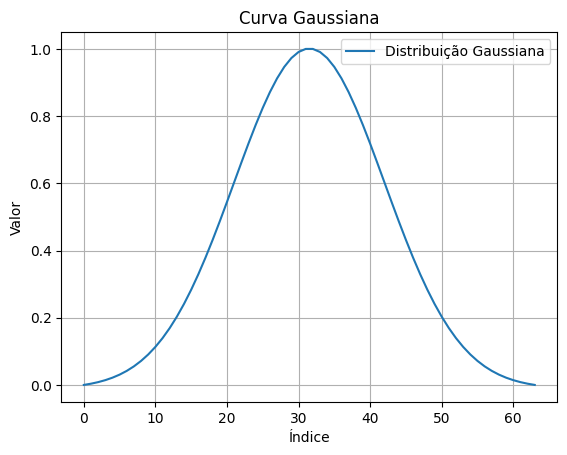

Vetor com distribuição gaussiana: [0.         0.00365169 0.00831086 0.01419527 0.02155133 0.03065248
 0.04179581 0.05529648 0.07147964 0.0906699  0.11317807 0.13928556
 0.16922668 0.20316948 0.24119597 0.2832828  0.32928352 0.37891384
 0.43174118 0.48717985 0.54449286 0.60280124 0.66110122 0.71828922
 0.77319398 0.82461487 0.8713645  0.91231375 0.94643689 0.97285409
 0.99086917 1.         1.         0.99086917 0.97285409 0.94643689
 0.91231375 0.8713645  0.82461487 0.77319398 0.71828922 0.66110122
 0.60280124 0.54449286 0.48717985 0.43174118 0.37891384 0.32928352
 0.2832828  0.24119597 0.20316948 0.16922668 0.13928556 0.11317807
 0.0906699  0.07147964 0.05529648 0.04179581 0.03065248 0.02155133
 0.01419527 0.00831086 0.00365169 0.        ]
(64,)


In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o número de elementos
n = 64

# Gerar um vetor com uma distribuição gaussiana
x = np.linspace(-3, 3, n)  # Cria um vetor de -3 a 3 com 64 pontos
mean = 0
std_dev = 1
gaussian_curve = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Normalizar para o intervalo [0, 1]
gaussian_curve = (gaussian_curve - np.min(gaussian_curve)) / (np.max(gaussian_curve) - np.min(gaussian_curve))

# Plotar o gráfico da curva gaussiana
plt.plot(gaussian_curve, label='Distribuição Gaussiana')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Curva Gaussiana')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar o vetor resultante
print("Vetor com distribuição gaussiana:", gaussian_curve)
print(gaussian_curve.shape)


In [65]:
# referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
referencias_as_paginas = random.choices(paginas, weights=gaussian_curve, k=qtd_referencias)

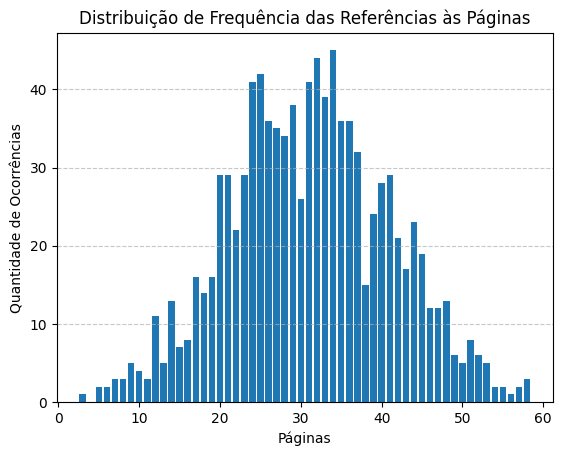

Vetor de referências: [28, 27, 31, 34, 7, 42, 25, 44, 55, 19, 32, 33, 22, 40, 46, 21, 18, 26, 39, 52, 40, 46, 25, 32, 19, 37, 49, 36, 51, 34, 31, 14, 22, 41, 37, 53, 41, 41, 23, 34, 35, 32, 58, 41, 36, 32, 39, 35, 20, 33, 39, 47, 39, 41, 19, 21, 44, 34, 25, 26, 31, 23, 49, 37, 21, 12, 18, 29, 47, 38, 30, 34, 30, 26, 26, 34, 33, 41, 13, 33, 25, 28, 34, 42, 38, 24, 46, 41, 32, 9, 37, 31, 32, 56, 22, 37, 37, 34, 19, 9, 33, 57, 45, 25, 42, 18, 46, 43, 32, 48, 44, 34, 23, 36, 48, 16, 21, 18, 39, 43, 29, 34, 30, 24, 19, 20, 35, 42, 20, 27, 37, 41, 42, 19, 41, 36, 25, 26, 23, 15, 17, 22, 23, 34, 20, 40, 45, 29, 48, 31, 44, 48, 45, 35, 36, 33, 45, 36, 43, 43, 37, 35, 18, 51, 41, 36, 44, 32, 24, 38, 26, 25, 31, 22, 28, 21, 13, 51, 46, 10, 20, 17, 30, 5, 24, 20, 27, 21, 32, 19, 35, 47, 31, 12, 31, 27, 25, 46, 17, 45, 14, 27, 25, 31, 19, 9, 57, 51, 26, 32, 48, 40, 29, 40, 25, 22, 33, 27, 36, 44, 47, 32, 26, 17, 29, 39, 23, 31, 47, 22, 33, 43, 51, 17, 17, 37, 30, 47, 29, 27, 25, 12, 36, 35, 45, 17

In [66]:
# Contar as ocorrências de cada valor
unique, counts = np.unique(referencias_as_paginas, return_counts=True)

# Plotar o gráfico de barras
plt.bar(unique, counts)
plt.xlabel('Páginas')
plt.ylabel('Quantidade de Ocorrências')
plt.title('Distribuição de Frequência das Referências às Páginas')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar o vetor resultante
print("Vetor de referências:", referencias_as_paginas)

{2: 294, 3: 281, 4: 266, 5: 275, 6: 260, 7: 290, 8: 295, 9: 264, 10: 263, 11: 253, 12: 257, 13: 231, 14: 237, 15: 230, 16: 233, 17: 230, 18: 231, 19: 229, 20: 229, 21: 228, 22: 228, 23: 227, 24: 227, 25: 227, 26: 227, 27: 227, 28: 227, 29: 227, 30: 227, 31: 227, 32: 227, 33: 226, 34: 226, 35: 226, 36: 226, 37: 226, 38: 226, 39: 226, 40: 226, 41: 226, 42: 226, 43: 226, 44: 226, 45: 226, 46: 226, 47: 226, 48: 226, 49: 226, 50: 226, 51: 226, 52: 226, 53: 226, 54: 226, 55: 226, 56: 226, 57: 226, 58: 226, 59: 226, 60: 226, 61: 226, 62: 226, 63: 226, 64: 226}


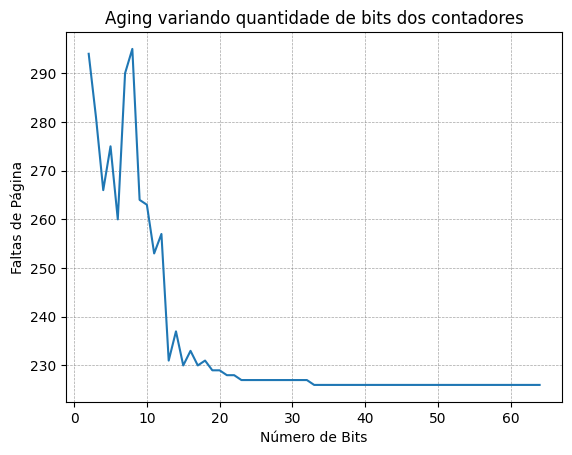

In [71]:
print(dict(zip(bits_range, resultados)))
resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)
plt.plot(
    bits_range,
    resultados,
    # marker='o'
    )
plt.xlabel('Número de Bits')
plt.ylabel('Faltas de Página')
plt.title('Aging variando quantidade de bits dos contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()

In [68]:
# aging vs fifo com conjunto de trabalhos

# qtd_paginas = 64
# qtd_referencias = 1000
max_molduras = 32

tamanho_molduras = np.arange(1, max_molduras + 1)

fifo_array = []
aging_array = []

for tamanho_moldura in tamanho_molduras:
    fifo_array.append(fifo(referencias_as_paginas, tamanho_moldura))
    aging_array.append(aging_bits(referencias_as_paginas, tamanho_moldura))



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
[982, 956, 932, 902, 884, 854, 819, 799, 772, 744, 711, 680, 656, 628, 605, 591, 567, 561, 535, 509, 493, 466, 444, 427, 400, 381, 356, 341, 320, 314, 304, 303]
[982, 957, 932, 903, 884, 850, 820, 787, 764, 735, 711, 677, 655, 630, 594, 566, 547, 523, 504, 472, 450, 426, 411, 381, 360, 338, 320, 294, 274, 260, 241, 227]


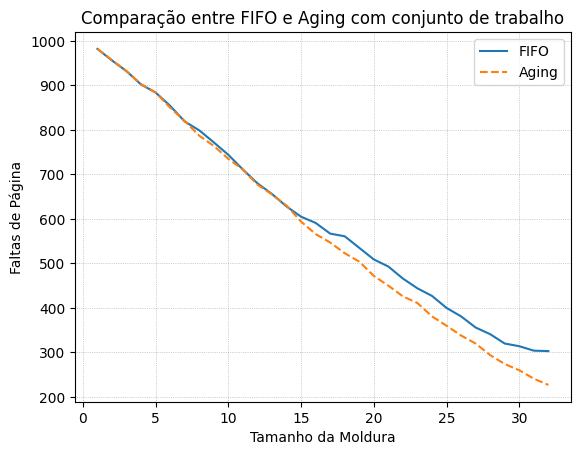

In [69]:
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging com conjunto de trabalho')
plt.legend()
plt.show()


In [ ]:
# max_molduras = 32

# tamanho_molduras = np.arange(1, max_molduras + 1)

# fifo_array = []
# aging_array = []

# for tamanho_moldura in tamanho_molduras:
#     fifo_array.append(fifo(referencias_as_paginas, tamanho_moldura))
#     aging_array.append(aging_bits(referencias_as_paginas, tamanho_moldura))

In [83]:
num_experiements = 100
qtd_paginas = 64
qtd_referencias = 1000
max_molduras = 32

paginas = np.arange(qtd_paginas)
m_r_fifo = np.zeros((num_experiements, max_molduras))
m_r_aging = np.zeros((num_experiements, max_molduras))

for i in range(num_experiements):
    print(f"\ri: {i}", end='')
    referencias_as_paginas = random.choices(paginas, weights=gaussian_curve, k=qtd_referencias)
    for j in range(1, max_molduras+1):
        # fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = qtd_referencias, qtd_paginas = qtd_paginas, max_molduras=max_molduras)
        fifo_value = fifo(referencias_as_paginas, j)
        aging_value = aging_bits(referencias_as_paginas, j)
        m_r_fifo[i, j-1] = fifo_value
        m_r_aging[i, j-1] = aging_value
        # m_r_fifo[i, j-1] = fifo_array[j-1]
        # m_r_aging[i, j-1] = aging_array[j-1]



i: 99

In [82]:
m_r_aging

array([[980., 956., 937., ..., 292., 272., 256.],
       [970., 936., 916., ..., 266., 242., 222.],
       [972., 936., 912., ..., 264., 244., 223.],
       ...,
       [972., 937., 913., ..., 261., 237., 219.],
       [978., 954., 918., ..., 265., 245., 226.],
       [965., 938., 904., ..., 270., 253., 228.]])

medias_fifo: [972.96 946.06 918.98 891.85 866.17 840.49 814.76 789.43 764.08 738.24
 714.18 689.75 665.51 640.57 617.44 594.1  571.23 549.48 528.06 505.25
 485.17 464.83 443.73 425.59 406.2  386.03 368.37 349.37 329.42 313.06
 296.6  280.88]
desvios_padrao_fifo: [ 5.25532111  7.51773902  9.023281   10.16698087 12.12522577 12.60911972
 13.44776561 13.93431376 13.32642488 14.20008451 15.08468097 15.94890278
 16.66403012 17.18444355 16.6980957  17.11461364 18.87318468 19.26887646
 19.25399699 19.05118107 18.67889451 17.76403952 16.87948755 17.88747886
 17.1610023  17.40256016 18.53950107 17.18060243 16.56694299 15.11477423
 15.67737223 16.45374122]
medias_aging: [972.96 945.9  918.74 891.58 865.39 839.61 812.93 785.62 760.21 734.2
 708.31 683.01 657.24 632.3  607.06 582.28 557.52 533.87 509.81 485.32
 462.07 438.54 416.84 394.6  373.44 352.57 331.76 311.61 291.4  271.21
 252.76 234.78]
desvios_padrao_aging: [ 5.25532111  7.60197343  9.19849988 10.07589202 12.08047598 13.10640683
 13.89046

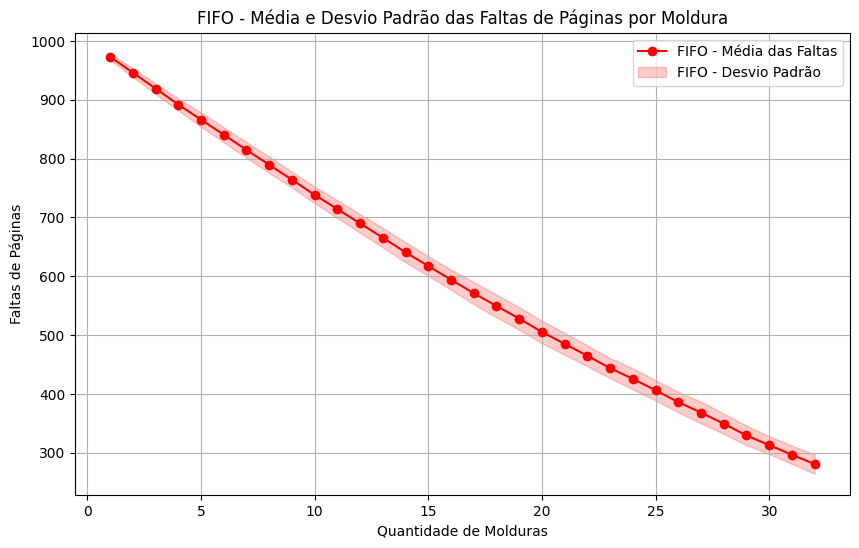

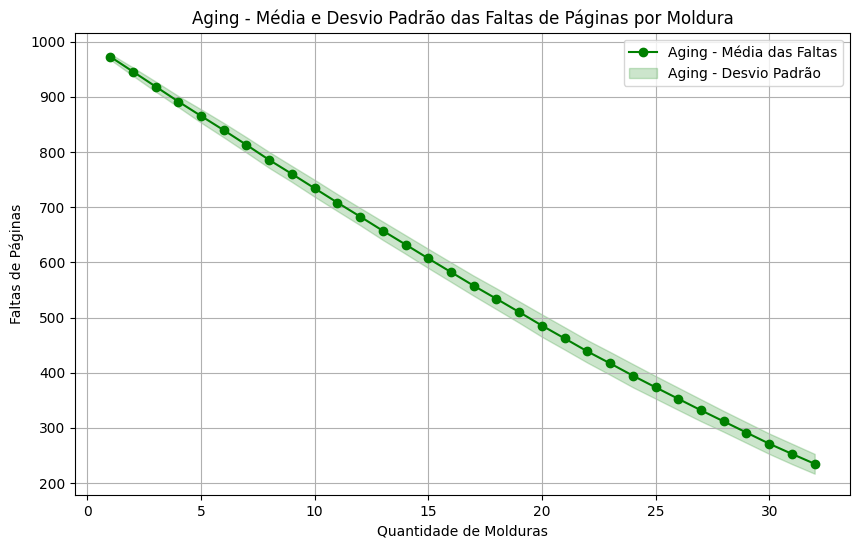

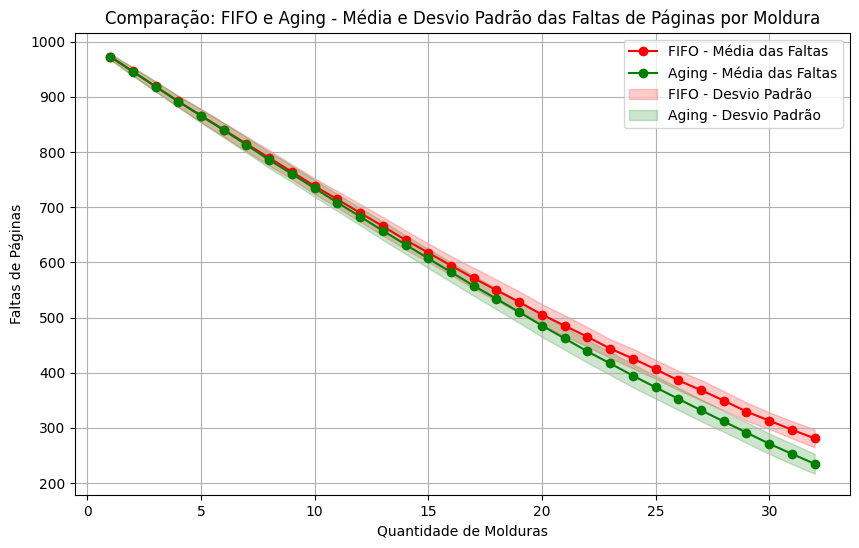

In [84]:


# Calcular as médias e desvios padrão
fifo_cor = "red"
aging_cor = "green"

medias_fifo = np.mean(m_r_fifo, axis=0)
desvios_padrao_fifo = np.std(m_r_fifo, axis=0)

medias_aging = np.mean(m_r_aging, axis=0)
desvios_padrao_aging = np.std(m_r_aging, axis=0)

print(f"medias_fifo: {medias_fifo}")
print(f"desvios_padrao_fifo: {desvios_padrao_fifo}")

print(f"medias_aging: {medias_aging}")
print(f"desvios_padrao_aging: {desvios_padrao_aging}")

# Quantidade de molduras
molduras = np.arange(1, max_molduras + 1)

# 1. Gráfico separado para FIFO
plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.title('FIFO - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico separado para Aging
plt.figure(figsize=(10, 6))
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gráfico combinando FIFO e Aging
plt.figure(figsize=(10, 6))
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Comparação: FIFO e Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()